<a href="https://colab.research.google.com/github/em4arkay/mnist-cnn/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN)

### Import TensorFlow

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

### Download and prepare the MNIST dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print('Train: images = %s, labels = %s' % (train_images.shape, train_labels.shape))
print('Test: images = %s, labels = %s' % (test_images.shape, test_labels.shape))

Train: images = (60000, 28, 28), labels = (60000,)
Test: images = (10000, 28, 28), labels = (10000,)


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


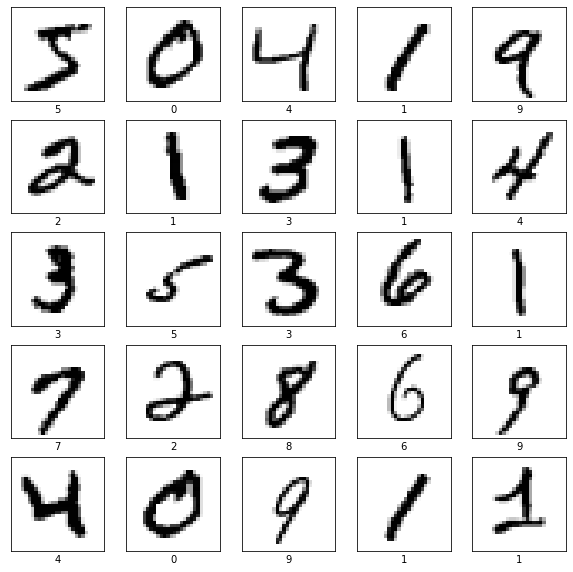

In [ ]:
class_names = ['0', '1', '2', '3', '4', 
                            '5', '6', '7', '8', '9']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Create the convolutional base

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          36928     
                                                                 
Total params: 89,024
Trainable params: 89,024
Non-traina

### Add Dense layers on top

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 256)               0

### Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                                validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 19s 4ms/step - loss: 0.2165 - accuracy: 0.9333 - val_loss: 0.0471 - val_accuracy: 0.9854
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0635 - accuracy: 0.9819 - val_loss: 0.0402 - val_accuracy: 0.9875
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0464 - accuracy: 0.9872 - val_loss: 0.0250 - val_accuracy: 0.9921
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0356 - accuracy: 0.9894 - val_loss: 0.0227 - val_accuracy: 0.9931
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0260 - accuracy: 0.9924 - val_loss: 0.0398 - val_accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0249 - accuracy: 0.9929 - val_loss: 0.0387 - val_accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0207 - accuracy: 0.9938 - val_loss: 0.0370 - val_accuracy: 0.9907
Ep

### Evaluate the model

313/313 - 1s - loss: 0.0391 - accuracy: 0.9921 - 657ms/epoch - 2ms/step


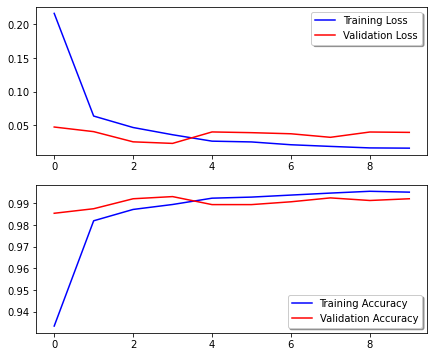

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(7, 6))
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss", axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
print('Test Accuracy core : %.2f', %test_acc)

SyntaxError: ignored

###Prediction MNIST


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

8


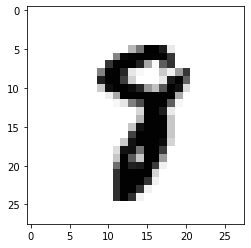

In [ ]:
from numpy import argmax

image_index = 435
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(test_images[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())